## Cargando datos con PDAL

In [1]:
import pdal
import numpy as np
from keras import layers
from keras import models
from keras.utils.np_utils import to_categorical

2024-11-24 01:10:16.704718: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
ppl="""
    {
        "pipeline":[
            "/mnt/c/Users/SergioLopez/Desktop/jupys/4_datosLidar/cassetteDefinitivo.ply"  
        ]  
    }"""

pipeline = pdal.Pipeline(ppl)
count = pipeline.execute()

In [3]:
print('numero de puntos de la nube cargada: '+str(count))

numero de puntos de la nube cargada: 12000000


In [4]:
dtst_ini=pipeline.arrays[0]
encbz_ini=pipeline.arrays[0].dtype.names

In [5]:
print('DATOS SUBIDOS CON PDAL\n')
print(encbz_ini)
print(dtst_ini[:3])

DATOS SUBIDOS CON PDAL

('X', 'Y', 'Z', 'gps_time', 'x_origin', 'y_origin', 'z_origin', 'Reflectance', 'range', 'theta', 'id', 'class', 'num_echo', 'nb_of_echo', 'NormalX', 'NormalY', 'NormalZ', 'Curvature', 'Coplanar', 'Classification', 'Linearity', 'Planarity', 'Scattering', 'Verticality', 'clase')
[(1903.38293457, 21122.49023438, 38.99118042, 54325.7300208, 1907.91113281, 21121.59375, 41.3255806 , -10.13949299, 5.17300034, -1.0635941 , 0., 3.030402e+08, 1., 1., 0.01977234, 0.03841527, 0.99906622, 0.00012633, 1., 2., 0.49403227, 0.49337065, 0.01259707, 0.02502576, 2.)
 (1903.40454102, 21122.48632812, 38.99028397, 54325.7300242, 1907.91101074, 21121.59375, 41.32598877,  -9.90949535, 5.15375042, -1.06141925, 0., 3.030402e+08, 1., 1., 0.01281706, 0.03584899, 0.99927502, 0.00019276, 1., 2., 0.40250596, 0.58131918, 0.01617487, 0.02798473, 2.)
 (1903.42822266, 21122.48046875, 38.99054718, 54325.7300277, 1907.9107666 , 21121.59375, 41.32639694,  -9.55949783, 5.13200045, -1.0592308 , 0., 3.0

In [6]:
encabezado=['X', 'Y', 'Z', 'theta', 'NormalX', 'NormalY', 'NormalZ', 'Linearity', 'Planarity', 'Scattering', 'Verticality', 'clase']

In [7]:
xyz=np.zeros((len(dtst_ini),len(encabezado)))

In [8]:
xyz.shape

(12000000, 12)

In [9]:
for e in range(len(xyz)):
    for i in range(len(encabezado)):
        xyz[e,i]=dtst_ini[e][encbz_ini.index(encabezado[i])]

In [10]:
xyz

array([[1.90338293e+03, 2.11224902e+04, 3.89911804e+01, ...,
        1.25970744e-02, 2.50257560e-02, 2.00000000e+00],
       [1.90340454e+03, 2.11224863e+04, 3.89902840e+01, ...,
        1.61748654e-02, 2.79847337e-02, 2.00000000e+00],
       [1.90342822e+03, 2.11224805e+04, 3.89905472e+01, ...,
        1.64639474e-02, 2.75164201e-02, 2.00000000e+00],
       ...,
       [1.89643286e+03, 2.13282695e+04, 3.78392601e+01, ...,
        5.47840331e-02, 5.02015847e-02, 0.00000000e+00],
       [1.89643970e+03, 2.13282695e+04, 3.78372459e+01, ...,
        5.37893355e-02, 5.38702627e-02, 0.00000000e+00],
       [1.89644543e+03, 2.13282715e+04, 3.78375206e+01, ...,
        5.11764411e-02, 7.01157388e-02, 0.00000000e+00]])

## Datasets

In [11]:
ptos=xyz[:,:3]

In [12]:
xs=xyz[:,3:-1]

In [13]:
ys=xyz[:,-1]

In [14]:
one_hot_train_labels = to_categorical(ys)

In [15]:
ptos_train=ptos[6000000:]
x_train=xs[6000000:]
y_train=one_hot_train_labels[6000000:]

In [16]:
ptos_val=ptos[5000000:6000000]
x_val=xs[5000000:6000000]
y_val=one_hot_train_labels[5000000:6000000]

In [17]:
ptos_test=ptos[:5000000]
x_test=xs[:5000000]
y_test=one_hot_train_labels[:5000000]

# Creación de la red

In [18]:
#creación del modelo
model = models.Sequential()
model.add(layers.Dense(45, activation='relu', input_shape=(8,))) # 8 son las carateristicas a evaluar en cada ejemplo
model.add(layers.Dense(3, activation='softmax')) # 3 clases para la clasificacion 

2024-11-24 01:24:15.747067: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-11-24 01:24:16.080081: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-24 01:24:16.083941: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1660 Ti computeCapability: 7.5
coreClock: 1.59GHz coreCount: 24 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 268.26GiB/s
2024-11-24 01:24:16.083987: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-11-24 01:24:16.116120: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-11-24 01:24:16.116200: I tensorflow/stream_execu

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 45)                405       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 138       
Total params: 543
Trainable params: 543
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [21]:
history = model.fit(x_train,
y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

2024-11-24 01:26:49.437552: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-11-24 01:26:49.440640: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2592005000 Hz


Epoch 1/20


2024-11-24 01:26:58.559125: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


   23/11719 [..............................] - ETA: 1:24 - loss: 1.0910 - accuracy: 0.3058

2024-11-24 01:26:59.983746: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


11719/11719 [==============================] - 85s 6ms/step - loss: 0.1510 - accuracy: 0.9404 - val_loss: 0.0662 - val_accuracy: 0.9731
Epoch 2/20
11719/11719 [==============================] - 70s 6ms/step - loss: 0.0634 - accuracy: 0.9769 - val_loss: 0.0514 - val_accuracy: 0.9809
Epoch 3/20
11719/11719 [==============================] - 69s 6ms/step - loss: 0.0582 - accuracy: 0.9784 - val_loss: 0.0525 - val_accuracy: 0.9805
Epoch 4/20
11719/11719 [==============================] - 70s 6ms/step - loss: 0.0559 - accuracy: 0.9793 - val_loss: 0.0520 - val_accuracy: 0.9799
Epoch 5/20
11719/11719 [==============================] - 69s 6ms/step - loss: 0.0544 - accuracy: 0.9797 - val_loss: 0.0483 - val_accuracy: 0.9823
Epoch 6/20
11719/11719 [==============================] - 69s 6ms/step - loss: 0.0534 - accuracy: 0.9801 - val_loss: 0.0474 - val_accuracy: 0.9821
Epoch 7/20
11719/11719 [==============================] - 69s 6ms/step - loss: 0.0525 - accuracy: 0.9803 - val_loss: 0.0516 - val

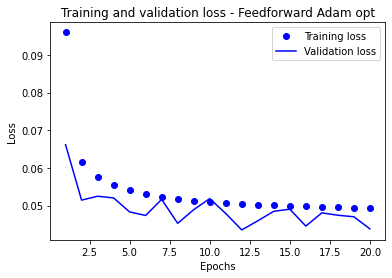

In [22]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Feedforward Adam opt')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

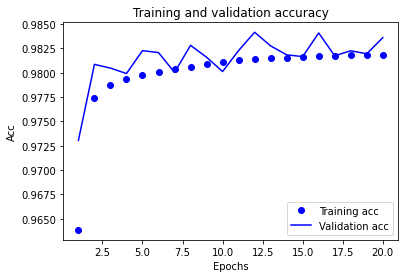

In [23]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 45)                405       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 138       
Total params: 543
Trainable params: 543
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.save('feedforward_adamOptDefault.h5')

## datos de test

## probando el modelo con nuevos datos

In [26]:
predictions = model.predict(x_test)

In [27]:
predictions

array([[0.00754799, 0.8777572 , 0.11469477],
       [0.01874568, 0.9233815 , 0.05787282],
       [0.02115779, 0.7642821 , 0.2145601 ],
       ...,
       [0.49712262, 0.33027697, 0.17260046],
       [0.34533775, 0.49445674, 0.16020554],
       [0.27653542, 0.5792221 , 0.14424253]], dtype=float32)

In [28]:
y_pred=np.zeros(len(x_test))
for e in range(len(predictions)):
    y_pred[e]=np.argmax(predictions[e])

In [29]:
np.unique(y_pred)

array([0., 1., 2.])

In [30]:
print(str(np.count_nonzero(y_pred==0))+' puntos clasificados como SR vs. '+str(sr_test))
print(str(np.count_nonzero(y_pred==1))+' puntos clasificados como suelo vs. '+str(suelo_test))
print(str(np.count_nonzero(y_pred==2))+' puntos clasificados como noSuelo vs. '+str(nosuelo_test))

np.count_nonzero(y_pred==0)+np.count_nonzero(y_pred==1)+np.count_nonzero(y_pred==2)

NameError: name 'sr_test' is not defined

In [31]:
print(str(np.count_nonzero(y_test==y_pred))+' puntos clasificados correctamente')

0 puntos clasificados correctamente


/home/xrg/anaconda3/envs/lidargpu/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


# exportando a ply

In [32]:
arch_ply='feedforward_AdamaDefault'

In [33]:
encabezado=['X', 'Y', 'Z', 'clase']

In [34]:
ptos_test

array([[ 1903.38293457, 21122.49023438,    38.99118042],
       [ 1903.40454102, 21122.48632812,    38.99028397],
       [ 1903.42822266, 21122.48046875,    38.99054718],
       ...,
       [ 1905.58642578, 21199.71679688,    37.98323059],
       [ 1905.59326172, 21199.71875   ,    37.98386002],
       [ 1905.59985352, 21199.71875   ,    37.98496628]])

In [35]:
y_pred

array([1., 1., 1., ..., 0., 1., 1.])

In [36]:
puntos=np.concatenate((ptos_test, y_pred[:,np.newaxis]), axis=1)

In [37]:
puntos.shape

(5000000, 4)

In [42]:
from ply import *

In [43]:
write_ply(arch_ply, puntos, encabezado)

True